## Assignment 2: Text Scraping & Clustering

This notebook is the second part of COMP41680 Assignment 2 and covers corpus exploration. The nltk.download, as seen at the bottom of the list of imports, was needed during implementation to run the lemmatizer function. Uncomment the download if it is required. There is also a stemming tokenizer which can be used instead if issues occur.

In [1]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import os
import nltk
import numpy as np
import scipy.cluster.hierarchy as hac
from sklearn.cluster import KMeans
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib as mpl
import pandas as pd
import mpld3
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display, HTML
#nltk.download('wordnet')
%matplotlib inline 


In [2]:
def stem_tokenizer(text):
    # use the standard scikit-learn tokenizer first
    standard_tokenizer = CountVectorizer().build_tokenizer()
    tokens = standard_tokenizer(text)
    # then use NLTK to perform stemming on each token
    stemmer = PorterStemmer()
    stems = []
    for token in tokens:
        stems.append( stemmer.stem(token) )
    return stems

def lemma_tokenizer(docs):
    # use the standard scikit-learn tokenizer first
    standard_tokenizer = CountVectorizer().build_tokenizer()
    tokens = standard_tokenizer(docs)
    # then use NLTK to perform lemmatisation on each token
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemma_tokens = []
    for token in tokens:
        lemma_tokens.append( lemmatizer.lemmatize(token) )
    return lemma_tokens

### Part 1: Read and Process Text
Each text file contains two strings, the first is the title and the second is the article. These are stored in a directory named data which is located in the same directory as this jupyter notebook. These text files will now be read in. Each article is appended to a list of strings named docs. Each title is read into a seperate list of strings named titles.

In [3]:
DATA_DIR = "data/"
for root, dirs, files in os.walk(DATA_DIR):
    docs=[]
    titles = []
    file_names = []
    for file in files:
        with open(root + file, 'r') as file_input:
            raw_document = file_input.readlines()
            docs.append(raw_document[1])
            titles.append(raw_document[0].replace('\n', ''))
            
    # Print some info to see what was read in
    print("root:",root)
    print("\nFirst 2 docs:\n", docs[0:2])
    print("\nFirst 10 titles:\n", titles[0:10])

root: data/

First 2 docs:
 ['Health Service Executive set to record overall net deficit of €219m for 2013 The deficit is higher  than that forecast by Minister for Health James Reilly. Photograph: Eric Luke The HSE will ask the Government to provide an additional €199 million in funding for this year. The Online News has learned that the health authority will record an overall net deficit of €219 million for 2013. However, about €20 million is to be provided to the HSE from a surplus reported in the Department of Health’s budget for this year. It is expected that Ministers will consider the HSE supplementary estimate at a Cabinet meeting tomorrow. It is also scheduled to be debated at a hearing of the Oireachtas health committee on Thursday. The overall financial deficit is less than the worst-case scenario of €286 million which the HSE projected in correspondence to the Department of Public Expenditure and Reform several weeks ago. However, it is higher than the deficit for the year 

### Part 2: Process Text and Create Document Term Matrix
The articles will now be pre-processed and the document term matrix created. This pre-processing involves making all characters lower case and removing terms which occur in more than 80% of documents and less than 5 documents. English stop words are also removed. 1, 2 and 3 ngrams are used and lemmatization is applied. The maximum number of features is set to 200,000.

In [4]:
vectorizer =  TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=5, stop_words='english',
                                 use_idf=True, tokenizer=lemma_tokenizer, ngram_range=(1,3))
tfidf_matrix = vectorizer.fit_transform(docs)
tfidf_list = tfidf_matrix.todense().tolist()
df_tfidf = pd.DataFrame(tfidf_list , index=titles, columns=vectorizer.get_feature_names())

print("Number of terms in tfidf matrix: ", df_tfidf.shape[1])
print("Number of documents in tfidf matrix: ", df_tfidf.shape[0])

Number of terms in tfidf matrix:  10134
Number of documents in tfidf matrix:  1130


In [5]:
# Display the pandas dataframe which represents the tfidf matrix
display(df_tfidf)

,000,000 adult,000 allowance,000 child,000 hospital,000 job,000 new,000 new gadget,000 new job,000 non,...,zinedine zidane,zola,zombie,zone,zone country,zone economy,zone finance,zone finance minister,zone unsustainable,zone unsustainable said
HSE to seek additional €199m funding for 2013,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
"US productivity rises modestly, wage inflation subdued",0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
English clubs make Euro history,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Gerrard plays down European hopes,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Revenue targets 60 wealthy individuals over non-payment of domicile levy,0.090598,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.057005,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Central Bank study says new plans needed to boost SME funding,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Fast moving phone bugs appear,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Beckham rules out management move,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Running university is serious business for Trinity’s provost,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Hitachi unveils 'fastest robot',0.020559,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


### Part 3: Summarise the Corpus

In order to explore the corpus the most common terms and highest weighted terms were found and plotted. The total number of terms is also shown.

In [6]:
# Get indices for terms in order of frequency
indices = np.argsort(vectorizer.idf_)[::-1]
print("indices of the 10 most highly weighted words:",indices[0:10])

# Get all terms
terms = vectorizer.get_feature_names()

# Order terms by weight
top_terms = [terms[i] for i in indices[:]]

# Display number of terms in corpus and most highly weighted words in corpus
print("\nNumber of terms in document term matrix: ", len(terms))
print("\nTop 10 terms in Corpus:")
print(top_terms[0:10])


indices of the 10 most highly weighted words: [10133  5268  5262  5254  5247  5240  5239  5235  5234  5205]

Number of terms in document term matrix:  10134

Top 10 terms in Corpus:
['zone unsustainable said', 'latest figure central', 'later week', 'larsson', 'large company', 'landline', 'landing', 'laid rest pillar', 'laid rest', 'know going']


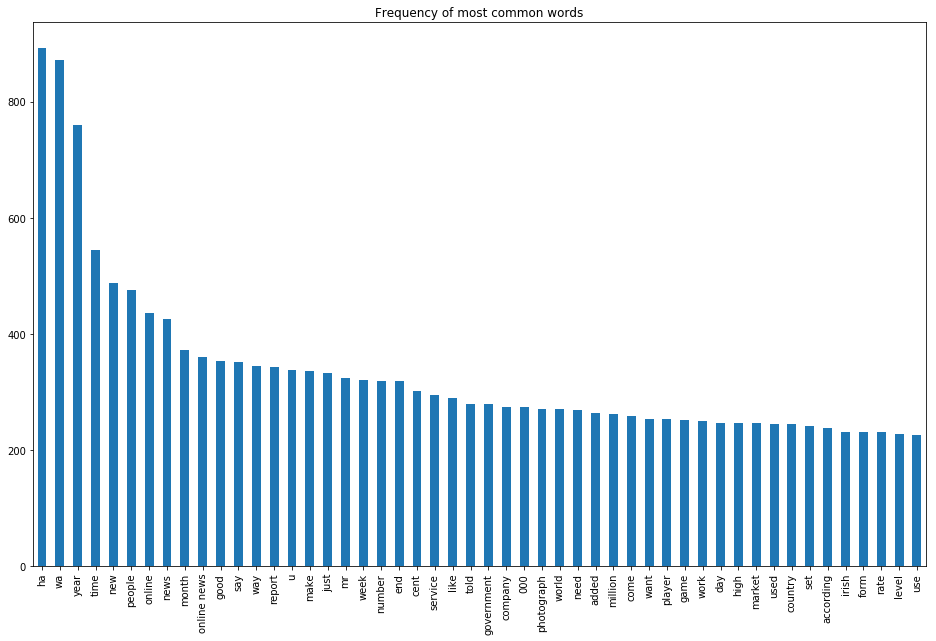

In [7]:

plt.figure(figsize=(16,10))
df_tfidf.astype(bool).sum(axis=0).sort_values(ascending=False)[:50].plot.bar()
# plt.bar(list(range(len(terms))),)
plt.title('Frequency of most common words')

10134


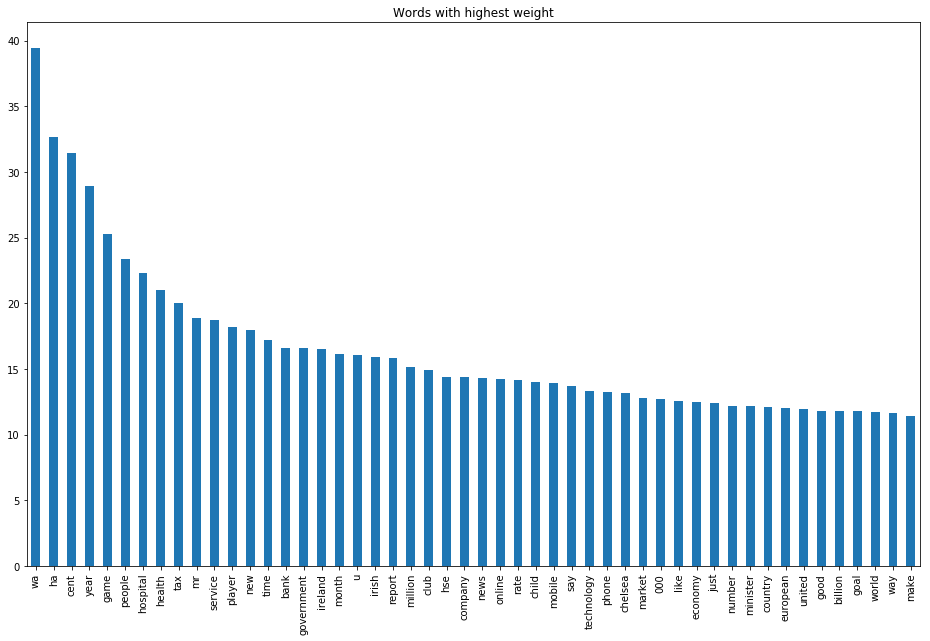

In [8]:
print(len(terms))
# print(len(df_tfidf.astype(bool).sum(axis=0).sort()))
plt.figure(figsize=(16,10))
df_tfidf.sum(axis=0).sort_values(ascending=False)[:50].plot.bar()
# plt.bar(list(range(len(terms))),)
plt.title('Words with highest weight')

### Part 4: Pre-processing before Clustering

The cosine similarities were calculated and multi dimensional scaling was used to reduce the dimensionality down to two dimensions so that the data could be visulised. Some CSS and Javascript was also included in order to display interactive plots. More info on this can be found at the source: http://brandonrose.org/clustering

In [9]:
num_clusters = 4

The cosine similarity is used to measure the similarity between documents. It ranges between 0 and 1 where a value of 1 indicates identical documents and a value of 0 indicates documents which share no terms in common. To demonstrate this, the cosine similarity between documents 1 and 2 can be seen to be 0.2.  The cosine similarity between documents 1 and 779 can be seen to be 0.82. 

In [10]:
print( "cos(D0,D2) = %.2f" % cosine_similarity(tfidf_matrix[0], tfidf_matrix[2]))
print( "cos(D0,D779) = %.2f" % cosine_similarity(tfidf_matrix[0], tfidf_matrix[779]))

print("Titles of documents 0, 2 and 779:")
print(titles[0])
print(titles[2])
print(titles[779])

cos(D0,D2) = 0.00
cos(D0,D779) = 0.65
Titles of documents 0, 2 and 779:
HSE to seek additional €199m funding for 2013
English clubs make Euro history
Government abandons plans to seek €100 million in payments from health insurers


In [11]:
dist = 1 - cosine_similarity(tfidf_matrix)
print(dist[0])

[  3.33066907e-16   9.50931323e-01   1.00000000e+00 ...,   9.70258859e-01
   9.87451777e-01   9.79655155e-01]


Convert to two components as we're plotting points in a two-dimensional plane.
dissimilarity is set to precomputed because a distance matrix is provided.
random_state is set so that the plot is reproducible.

In [12]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

In [13]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a'}

#set up cluster names using a dict
cluster_names = {0: 'Technology', 
                 1: 'Finance', 
                 2: 'Health', 
                 3: 'Sport'}

In [14]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [15]:
#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

### Part 5: K-Means Clustering

Create clusters using kmeans algorithm and display clusters. The clusters are grouped in a dataframe and this allows the content to be investigated.

In [16]:
# Create the kmeans clusters
km = KMeans(n_clusters=num_clusters)
kmeans = km.fit(tfidf_matrix)
clusters_kmeans = km.labels_.tolist()

# Display 10 of the cluster values
print(clusters_kmeans[0:10])

[2, 1, 3, 3, 1, 1, 0, 3, 1, 0]


In [17]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df_kmeans = pd.DataFrame(dict(x=xs, y=ys, label=clusters_kmeans, title=titles)) 

#group by cluster
groups_kmeans = df_kmeans.groupby('label')
for index in range(len(cluster_names)):
    display(groups_kmeans.get_group(index)[0:10])


,label,title,x,y
6,0,Fast moving phone bugs appear,0.371109,-0.645353
9,0,Hitachi unveils 'fastest robot',0.695808,0.165971
15,0,Mobile TV tipped as one to watch,-0.064977,-0.686501
19,0,No half measures with Half-Life 2,0.212660,-0.370787
28,0,US state acts to stop 'spammers',0.680447,-0.353175
29,0,Local net TV takes off in Austria,0.259741,-0.144477
30,0,Rings of steel combat net attacks,0.154138,-0.689826
33,0,Hollywood campaign hits websites,0.233710,-0.722549
36,0,Loyalty cards idea for TV addicts,-0.231968,-0.714908
40,0,T-Mobile bets on 'pocket office',0.163952,-0.609805


,label,title,x,y
1,1,"US productivity rises modestly, wage inflation...",-0.387119,0.628993
4,1,Revenue targets 60 wealthy individuals over no...,-0.224886,-0.137278
5,1,Central Bank study says new plans needed to bo...,-0.577434,0.427537
8,1,Running university is serious business for Tri...,-0.063100,0.581400
12,1,Chancellor says criticism of German current-ac...,-0.208291,0.690394
16,1,"Fiscal consolidation must continue, IMF says",-0.036243,0.072206
20,1,Government to negotiate on all fronts for debt...,-0.503891,0.213193
22,1,"Pearse Lyons, the Alltech billionaire, was in ...",0.451766,0.119063
23,1,Consumer sentiment continues to rise in October,-0.101765,0.323900
26,1,Alcatel-Lucent plans to reduce 14 per cent of ...,-0.417797,-0.195680


,label,title,x,y
0,2,HSE to seek additional €199m funding for 2013,0.228638,0.526675
10,2,Board of West/North-West Hospitals group says ...,0.471726,0.600655
11,2,New national’s children’s hospital in Dublin m...,0.313275,0.690736
14,2,Board member hopes controversy around top-up p...,0.386706,0.556017
17,2,Ireland has fifth highest cancer bill per citi...,0.397781,0.373338
21,2,State ‘unprepared’ to care for ageing population,0.420145,0.222202
24,2,Minister says profitable health insurers can a...,0.194654,0.407108
31,2,High rate of undiagnosed HIV detected in Mater...,0.416641,0.099057
35,2,Reilly requests ‘urgent action’ to ensure agen...,0.563302,0.499049
41,2,Decision comes after institution agrees to imp...,0.602591,0.491154


,label,title,x,y
2,3,English clubs make Euro history,0.622593,-0.480712
3,3,Gerrard plays down European hopes,-0.011284,0.536645
7,3,Beckham rules out management move,-0.731597,0.222289
13,3,Sanchez targets NI win in Warsaw,0.544934,-0.313859
18,3,Redknapp poised for Saints,0.733289,-0.036467
25,3,Mourinho receives Robson warning,-0.013488,0.678470
27,3,Man Utd through after Exeter test,-0.629000,-0.446440
32,3,McClaren targets Champions League,-0.364102,-0.688403
34,3,The wonder of Ronaldinho,0.458800,-0.380609
37,3,O'Leary agrees new Villa contract,0.656514,0.359417


In [ ]:
# Plot is interactive
fig, ax = plt.subplots(figsize=(14,8)) #set plot size
ax.margins(0.15) # Optional, just adds 15% padding to the autoscaling

#iterate through groups to layer the plot
#note that cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups_kmeans:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels, voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot


### Part 6: Agglomerative Clustering

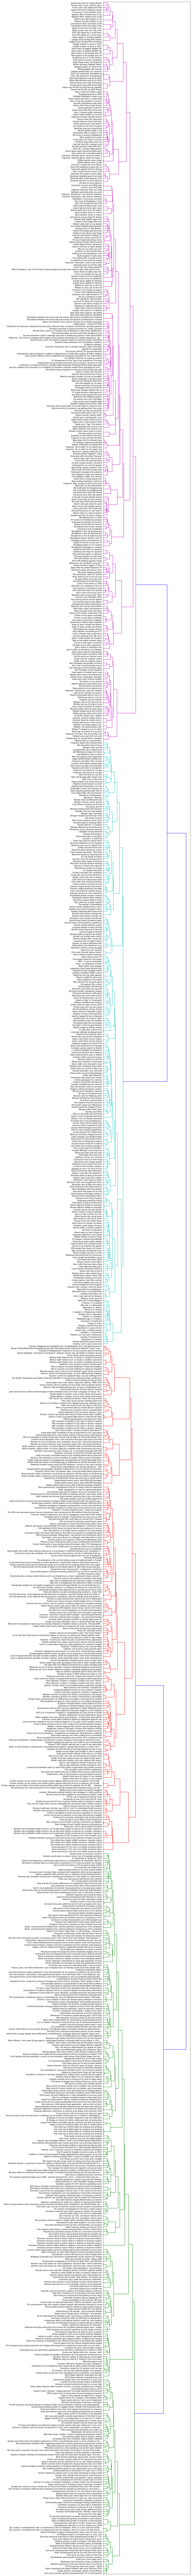

In [ ]:
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances
fig, ax = plt.subplots(figsize=(15, 200)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles, leaf_font_size=10);
    
plt.tick_params(\
    axis= 'x',         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

In [ ]:
clusters_agg = fcluster(linkage_matrix,4,'maxclust')
print(clusters_agg)

[2 1 3 ..., 1 4 4]


In [ ]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df_agg = pd.DataFrame(dict(x=xs, y=ys, label=clusters_agg, title=titles)) 

#group by cluster
groups_agg = df_agg.groupby('label')
print(groups_agg.head(2))

    label                                              title         x  \
0       2      HSE to seek additional €199m funding for 2013  0.228638   
1       1  US productivity rises modestly, wage inflation... -0.387119   
2       3                    English clubs make Euro history  0.622593   
3       3                  Gerrard plays down European hopes -0.011284   
4       1  Revenue targets 60 wealthy individuals over no... -0.224886   
6       4                      Fast moving phone bugs appear  0.371109   
8       4  Running university is serious business for Tri... -0.063100   
10      2  Board of West/North-West Hospitals group says ...  0.471726   

           y  
0   0.526675  
1   0.628993  
2  -0.480712  
3   0.536645  
4  -0.137278  
6  -0.645353  
8   0.581400  
10  0.600655  


In [ ]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df_agg = pd.DataFrame(dict(x=xs, y=ys, label=clusters_agg, title=titles)) 

#group by cluster
groups_agg = df_agg.groupby('label')
display(groups_agg)
for index in range(1,num_clusters+1):
    display(groups_agg.get_group(index)[0:10])

,label,title,x,y
1,1,"US productivity rises modestly, wage inflation...",-0.387119,0.628993
4,1,Revenue targets 60 wealthy individuals over no...,-0.224886,-0.137278
5,1,Central Bank study says new plans needed to bo...,-0.577434,0.427537
12,1,Chancellor says criticism of German current-ac...,-0.208291,0.690394
16,1,"Fiscal consolidation must continue, IMF says",-0.036243,0.072206
20,1,Government to negotiate on all fronts for debt...,-0.503891,0.213193
22,1,"Pearse Lyons, the Alltech billionaire, was in ...",0.451766,0.119063
23,1,Consumer sentiment continues to rise in October,-0.101765,0.323900
26,1,Alcatel-Lucent plans to reduce 14 per cent of ...,-0.417797,-0.195680
39,1,Irish near top of OECD table for smoking and d...,-0.004720,0.617028


,label,title,x,y
0,2,HSE to seek additional €199m funding for 2013,0.228638,0.526675
10,2,Board of West/North-West Hospitals group says ...,0.471726,0.600655
11,2,New national’s children’s hospital in Dublin m...,0.313275,0.690736
14,2,Board member hopes controversy around top-up p...,0.386706,0.556017
17,2,Ireland has fifth highest cancer bill per citi...,0.397781,0.373338
21,2,State ‘unprepared’ to care for ageing population,0.420145,0.222202
24,2,Minister says profitable health insurers can a...,0.194654,0.407108
31,2,High rate of undiagnosed HIV detected in Mater...,0.416641,0.099057
35,2,Reilly requests ‘urgent action’ to ensure agen...,0.563302,0.499049
41,2,Decision comes after institution agrees to imp...,0.602591,0.491154


,label,title,x,y
2,3,English clubs make Euro history,0.622593,-0.480712
3,3,Gerrard plays down European hopes,-0.011284,0.536645
7,3,Beckham rules out management move,-0.731597,0.222289
13,3,Sanchez targets NI win in Warsaw,0.544934,-0.313859
18,3,Redknapp poised for Saints,0.733289,-0.036467
25,3,Mourinho receives Robson warning,-0.013488,0.678470
27,3,Man Utd through after Exeter test,-0.629000,-0.446440
32,3,McClaren targets Champions League,-0.364102,-0.688403
34,3,The wonder of Ronaldinho,0.458800,-0.380609
37,3,O'Leary agrees new Villa contract,0.656514,0.359417


,label,title,x,y
6,4,Fast moving phone bugs appear,0.371109,-0.645353
8,4,Running university is serious business for Tri...,-0.063100,0.581400
9,4,Hitachi unveils 'fastest robot',0.695808,0.165971
15,4,Mobile TV tipped as one to watch,-0.064977,-0.686501
19,4,No half measures with Half-Life 2,0.212660,-0.370787
28,4,US state acts to stop 'spammers',0.680447,-0.353175
29,4,Local net TV takes off in Austria,0.259741,-0.144477
30,4,Rings of steel combat net attacks,0.154138,-0.689826
33,4,Hollywood campaign hits websites,0.233710,-0.722549
36,4,Loyalty cards idea for TV addicts,-0.231968,-0.714908
